In [29]:
#importing important liabries 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import warnings

# To ignore all warnings (not recommended unless you are sure)
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from the CSV file
data = pd.read_csv('Fatala-Police-Killing-in-the-USA_main_fatal_police_killings_in_the_USA_DownloadedData_fatal-police-shootings-data.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [3]:
#Explore dataset statistics
data.describe()

,id,age,longitude,latitude
count,7662.000000,7198.000000,6832.000000,6832.000000
mean,4232.256983,37.154210,-97.056950,36.669658
std,2392.923808,12.944269,16.597978,5.394650
min,3.000000,2.000000,-160.007000,19.498000
25%,2148.250000,27.000000,-112.042250,33.480000
50%,4256.500000,35.000000,-94.242000,36.095500
75%,6306.750000,45.000000,-83.083250,40.025250
max,8336.000000,92.000000,-67.867000,71.301000


In [4]:
#Check for missing values
data.isnull().sum()

id                            0
name                        399
date                          0
manner_of_death               0
armed                       209
age                         464
gender                       18
race                       1424
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        853
body_camera                   0
longitude                   830
latitude                    830
is_geocoding_exact            0
dtype: int64

In [5]:
# Calculate percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a summary dataframe with columns and their corresponding missing percentage
missing_data_summary = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

# Set the threshold for missing values percentage (e.g., 10%)
threshold = 10

# List columns where missing percentage is above the threshold
columns_above_threshold = missing_data_summary[missing_data_summary['Missing Percentage'] > threshold]['Column']

# Output the summary
missing_data_summary

,Column,Missing Percentage
0,id,0.000000
1,name,5.207518
2,date,0.000000
3,manner_of_death,0.000000
4,armed,2.727747
5,age,6.055860
6,gender,0.234926
7,race,18.585226
8,city,0.000000
9,state,0.000000


In [6]:
def miss(data):
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    return missing_percentage

In [7]:
# Handle missing values (if any)
# For simplicity, removing rows with missing values  
data = data.dropna()

In [8]:
#now all the null values are removed 
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

In [9]:
#Check the data types of each column in the DataFrame
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [10]:
# Removes duplicate rows
data.drop_duplicates(inplace=True) 

In [11]:
# Select relevant features for clustering
features = data[['age', 'longitude', 'latitude']]

# Standardize the features (important for clustering algorithms)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

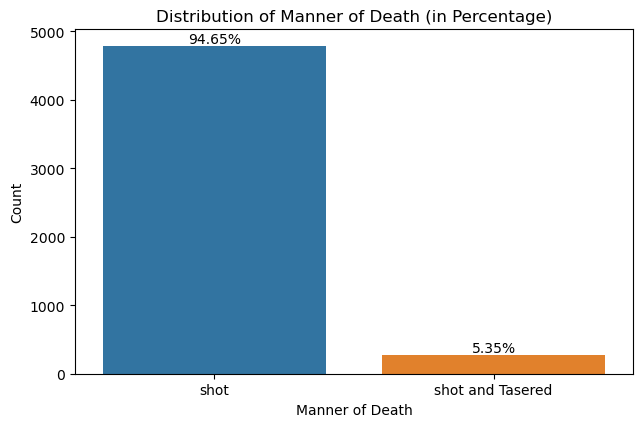

In [12]:
# Calculate the percentages for each category in 'manner_of_death'
manner_of_death_counts = data['manner_of_death'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 1)

# Create the count plot
sns.countplot(x='manner_of_death', data=data)

# Annotate the bars with percentages
total = len(data['manner_of_death'])
for index, value in enumerate(manner_of_death_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Distribution of Manner of Death (in Percentage)')
plt.tight_layout()
plt.show()


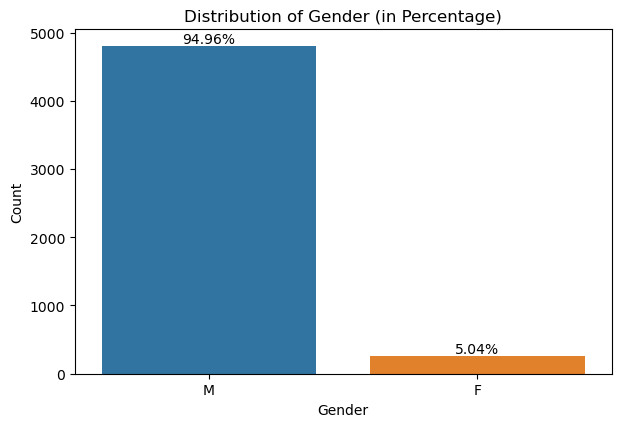

In [13]:

# Calculate the percentages for each category in 'gender'
gender_counts = data['gender'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 2)

# Create the count plot
sns.countplot(x='gender', data=data)

# Annotate the bars with percentages
total = len(data['gender'])
for index, value in enumerate(gender_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender (in Percentage)')
plt.tight_layout()
plt.show()


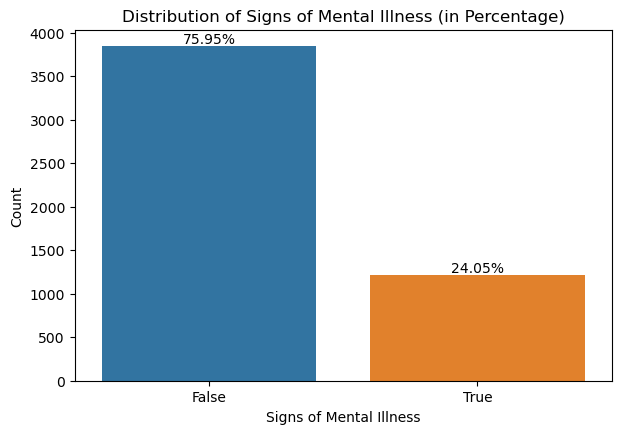

In [14]:

# Calculate the percentages for each category in 'signs_of_mental_illness'
mental_illness_counts = data['signs_of_mental_illness'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(18, 12))
plt.xticks(rotation=45)
plt.subplot(3, 3, 5)

# Create the count plot
sns.countplot(x='signs_of_mental_illness', data=data)

# Annotate the bars with percentages
total = len(data['signs_of_mental_illness'])
for index, value in enumerate(mental_illness_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Distribution of Signs of Mental Illness (in Percentage)')
plt.tight_layout()
plt.show()


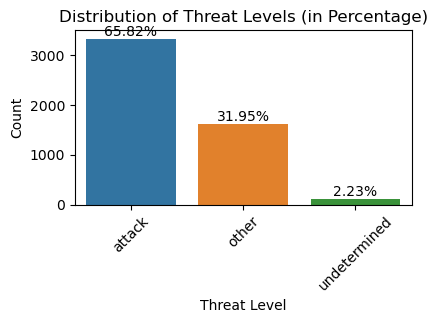

In [15]:

# Calculate the percentages for each category in 'threat_level'
threat_level_counts = data['threat_level'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 6)

# Create the count plot
sns.countplot(x='threat_level', data=data)

# Annotate the bars with percentages
total = len(data['threat_level'])
for index, value in enumerate(threat_level_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.title('Distribution of Threat Levels (in Percentage)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



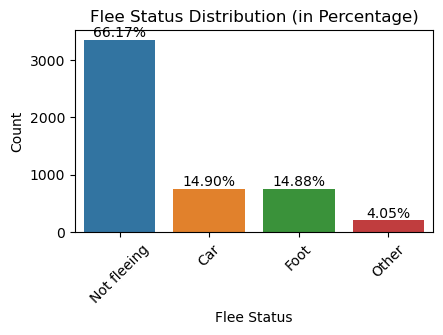

In [16]:

# Calculate the percentages for each category in 'flee'
flee_counts = data['flee'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 7)

# Create the count plot
sns.countplot(x='flee', data=data)

# Annotate the bars with percentages
total = len(data['flee'])
for index, value in enumerate(flee_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Flee Status')
plt.ylabel('Count')
plt.title('Flee Status Distribution (in Percentage)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


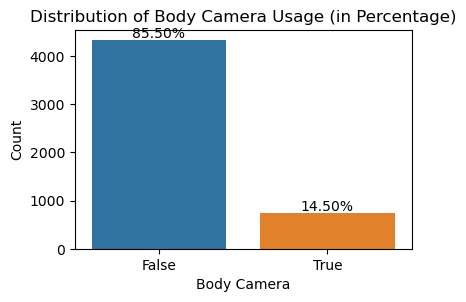

In [17]:

# Calculate the percentages for each category in 'body_camera'
body_camera_counts = data['body_camera'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 8)

# Create the count plot
sns.countplot(x='body_camera', data=data)

# Annotate the bars with percentages
total = len(data['body_camera'])
for index, value in enumerate(body_camera_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Body Camera')
plt.ylabel('Count')
plt.title('Distribution of Body Camera Usage (in Percentage)')
plt.tight_layout()
plt.show()


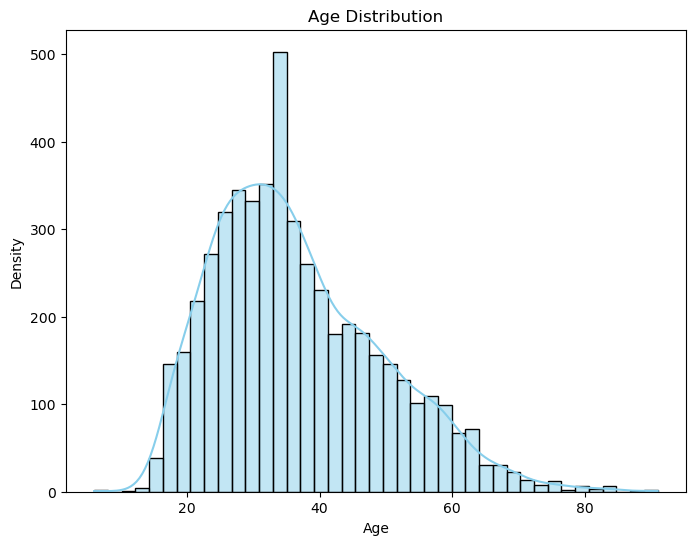

In [18]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

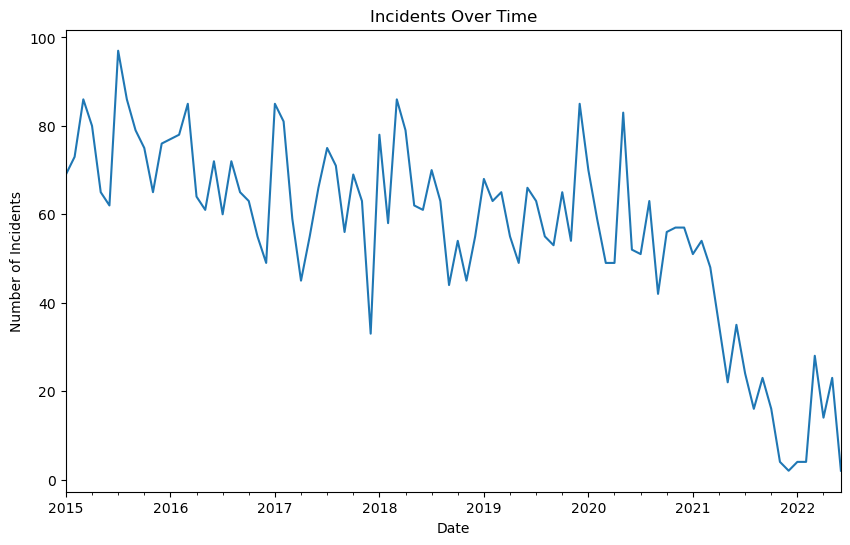

In [19]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Incidents over time
plt.figure(figsize=(10, 6))
data.set_index('date').resample('M').size().plot()
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Incidents Over Time')
plt.show()

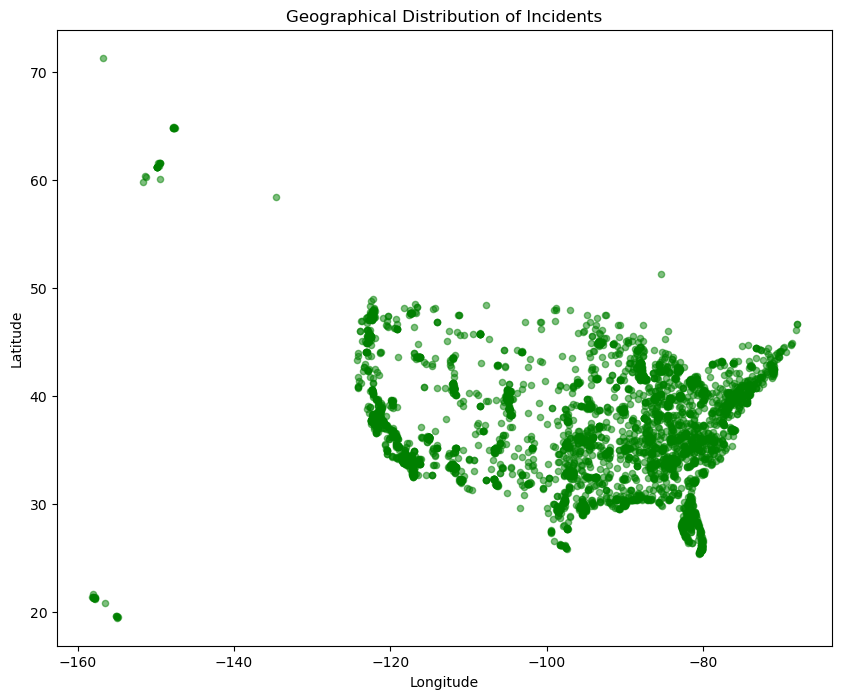

In [20]:
# Geographical distribution of incidents
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], s=20, color='green', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Incidents')
plt.show()

In [26]:
# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()

# Encode 'manner_of_death', 'armed', 'gender', 'race', 'city', and 'state'
categorical_columns = ['manner_of_death', 'armed', 'gender', 'race', 'city', 'state']
for column in categorical_columns:
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])

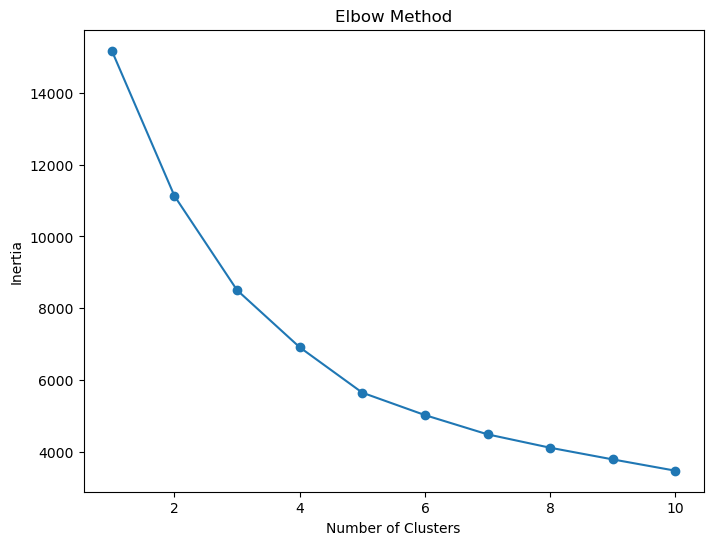

In [22]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


# Based on the Elbow Method, choose the optimal number of clusters (let's say k=3)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


# Add the cluster labels to the original dataset
data['cluster'] = clusters

In [23]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,longitude,latitude,is_geocoding_exact,manner_of_death_encoded,armed_encoded,gender_encoded,race_encoded,city_encoded,state_encoded,cluster
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,-123.122,47.247,True,0,34,1,0,1908,47,4
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,-122.892,45.487,True,0,34,1,5,32,37,4
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,-97.281,37.695,True,1,84,1,2,2258,16,3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,-122.422,37.763,True,0,83,1,5,1843,4,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,-104.692,40.384,True,0,60,1,2,647,5,1


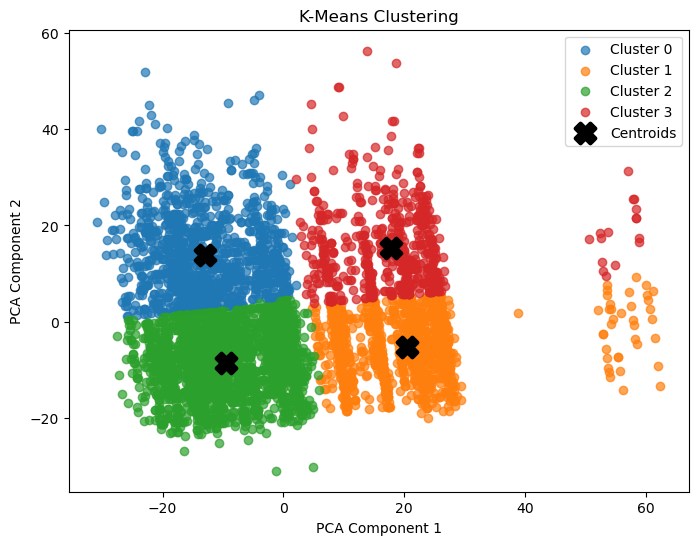

In [49]:
# Assuming you have a preprocessed DataFrame 'data' with numerical features for clustering
# Select relevant features for clustering (excluding non-numeric columns like 'id', 'name', 'date')
features = data[['age', 'signs_of_mental_illness', 'longitude', 'latitude']]

# Choose the number of clusters (K)
num_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels to the original DataFrame
data['cluster'] = clusters

# Interpretation: Analyze clusters to understand common traits
cluster_traits = data.groupby('cluster').mean()

# Visualization: Use PCA for dimensionality reduction and scatter plot for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
plt.figure(figsize=(8, 6))

# Scatter plot clusters in 2D using PCA components
for i in range(num_clusters):
    plt.scatter(pca_features[clusters == i, 0], pca_features[clusters == i, 1], label=f'Cluster {i}', alpha=0.7)

plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
            marker='X', s=200, linewidths=3, color='black', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [42]:
# Assuming 'data' DataFrame has the 'cluster' column added after clustering
unique_clusters = data['cluster'].unique()


array([3, 2, 1, 0], dtype=int32)